# Predicting MPG with OLS

**Author:** Richard Hemphill<br>
**ID:** 903877709<br>
**Class:** ECE5268 Theory of Neural Networks<br>
**Instructor:** Dr. Georgios C. Anagnostopoulos<br>
**Description:** Utilize characteristics from various cars to predict miles-per-gallon fuel consumption.  The prediction equation is determined using Ordinary Least Squares regression.

In [49]:
# CONSTANTS
DATASET_FILE = 'autompg_dataset.csv'
NUMBER_FOR_TRAINING = 200
NUMBER_FOR_VALIDATION = 100

In [50]:
# LIBRARIES
import time                         # processing throughput
import numpy as np                  # matrix manipulation
import random                       # shuffle data
import matplotlib.pyplot as plt     # surface plot

In [51]:
# FUNCTIONS
# Create Augmented Design Matrix
def AugmentedDesignMatrix(dataSet, features):
    # Create the design matrix.
    adm = dataSet[features[0]]
    for feature in features[1:]:
        adm = np.column_stack((adm,dataSet[feature]))
     # Augment the design matrix to accomodate the bias term.
    adm = np.column_stack((adm,np.ones(len(adm))))
    return adm

In [52]:
# Calculate Mean Squared Error
def MSE(actual, predicted):
    return np.square(np.subtract(actual, predicted)).mean()

In [53]:
def PredictionEquation(y, xs, w):
    eq = '{} = '.format(y)
    wfmat = lambda i: ('+' if i > 0 else '') + '{:0.6}'.format(i)
    for idx, x in enumerate(xs):
        eq = eq + '{}*{}'.format(wfmat(w[idx]), x)
    eq = eq + wfmat(w[-1])
    return eq

In [54]:
# Load data file
csvFile = open(DATASET_FILE, 'r')
dataSet = np.genfromtxt(csvFile, delimiter=',', names=True, case_sensitive=True)
csvFile.close()

In [55]:
# Split the data set into groups for training, validation and test.
trainData = dataSet[:NUMBER_FOR_TRAINING]
valData = dataSet[NUMBER_FOR_TRAINING+1:NUMBER_FOR_TRAINING+NUMBER_FOR_VALIDATION]
testData = dataSet[NUMBER_FOR_TRAINING+NUMBER_FOR_VALIDATION+1:]

In [56]:
# Specify the output feature
OUTPUT_FEATURE='mpg'

In [57]:
# Create the output vector
Y = trainData[OUTPUT_FEATURE]

## Part (a): Model 1 Regression
Use OLS regression on the training data to predict _mpg_ based on _horsepower_ and _weight_.

In [58]:
# Specify the input features to be used.
inputFeatures1=['horsepower', 'weight']

In [59]:
# Create the augmented the design matrix
X1 = AugmentedDesignMatrix(dataSet=trainData,features=inputFeatures1)

In [60]:
# Create the augmented model parameter vector.
W1 = np.ones(len(inputFeatures1)+1)

In [61]:
# Calculate the augmented model parameter vector using OLS
tic = time.time()
R = np.dot(X1.T, X1)
Rinv = np.linalg.inv(R)
W1 = np.dot(np.dot(Rinv, X1.T), Y)
procTime = time.time()-tic
print('Processing Time: {:0.9f}'.format(procTime))

Processing Time: 0.000997066


### i Prediction Equation

In [62]:
print(PredictionEquation(y=OUTPUT_FEATURE, xs=inputFeatures1, w=W1))

mpg = -0.01919*horsepower-0.0048946*weight+37.5473


### ii Optimal Training MSE

In [63]:
print('Training MSE (Model 1): {:.3f}'.format(MSE(Y,np.dot(X1,W1))))

Training MSE (Model 1): 6.085


### Observation
The predition equation makes sense.  Effenent cars have an _mpg_ in the 30's (bias).  Sports cars (high _horsepower_) are not as gas efficient.  The heavier the car (_weight_), the more fuel energy it needs to move.

## Part (b): Fitted Model 1 Plot

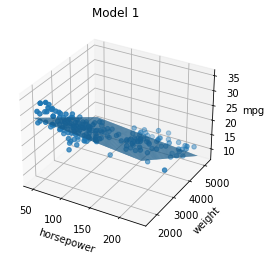

In [64]:
# Create figure object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Limit plot range
NUM_STEPS=100

# Process x-axis points
Xmin = min(trainData[inputFeatures1[0]])
Xmax = max(trainData[inputFeatures1[0]])
Xstep = (Xmax-Xmin)/NUM_STEPS
x = np.arange(Xmin, Xmax, Xstep)

# Process y-axis points
Ymin = min(trainData[inputFeatures1[1]])
Ymax = max(trainData[inputFeatures1[1]])
Ystep = (Ymax-Ymin)/NUM_STEPS
y = np.arange(Ymin, Ymax, Ystep)

# Create a grid of points
Xpoints, Ypoints = np.meshgrid(x, y)

# Set the z-axis points
zs = np.array(W1[0]*Xpoints + W1[1]*Ypoints + W1[2])
Zpoints = zs.reshape(Xpoints.shape)

# Plot the predicted surface
ax.plot_surface(Xpoints, Ypoints, Zpoints)

# Add scatter plot of the training data
ax.scatter(trainData[inputFeatures1[0]], trainData[inputFeatures1[1]], trainData[OUTPUT_FEATURE])

# Label the plot
ax.set_xlabel(inputFeatures1[0])
ax.set_ylabel(inputFeatures1[1])
ax.set_zlabel(OUTPUT_FEATURE)
plt.title('Model 1')
plt.show()

### Observation
The surface plot aligns well with the training data.  It crosses the middle of the _mpg_ values for the various training points.

## Part (c): Model 2 Regression
Use OLS regression on the training data to predict _mpg_ based on _horsepower_, _weight_, _cylinders_, _displacement_, and _acceleration_.

In [65]:
# Specify the input features to be used.
inputFeatures2=['horsepower', 'weight', 'cylinders', 'displacement', 'acceleration']

In [66]:
# Create the augmented the design matrix
X2 = AugmentedDesignMatrix(dataSet=trainData,features=inputFeatures2)

In [67]:
# Create the augmented model parameter vector.
W2 = np.ones(len(inputFeatures2)+1)

In [73]:
# Calculate the augmented model parameter vector using OLS
tic = time.time()
R = np.dot(X2.T, X2)
Rinv = np.linalg.inv(R)
W2 = np.dot(np.dot(Rinv, X2.T), Y)
procTime = time.time()-tic
print('Processing Time: {:0.9f}'.format(procTime))

Processing Time: 0.000992060


### i Prediction Equation

In [69]:
print(PredictionEquation(y=OUTPUT_FEATURE, xs=inputFeatures2, w=W2))

mpg = -0.0148923*horsepower-0.00332255*weight-0.382328*cylinders-0.0116476*displacement-0.150955*acceleration+39.1763


### ii Optimal Training MSE

In [70]:
print('Training MSE (Model 2): {:.3f}'.format(MSE(Y,np.dot(X2,W2))))

Training MSE (Model 2): 5.716


### Observation
The MSE is lower than Model 1 for most runs due to the ability to fine tune the predictions with more parameters.

## Part (d): Best Model

### Validation MSE

In [71]:
mse1 = MSE(valData[OUTPUT_FEATURE],np.dot(AugmentedDesignMatrix(valData[inputFeatures1],inputFeatures1),W1))
mse2 = MSE(valData[OUTPUT_FEATURE],np.dot(AugmentedDesignMatrix(valData[inputFeatures2],inputFeatures2),W2))
print('Validation MSE: Model 1 = {:.3f}, Model 2 = {:.3f}'.format(mse1,mse2))

Validation MSE: Model 1 = 17.255, Model 2 = 18.182


### Test MSE for Best Model

In [72]:
if mse1 < mse2:
    bestModel = 1
    bestInputFeatures = inputFeatures1
    bestWeights = W1
else:
    bestModel = 2
    bestInputFeatures = inputFeatures2
    bestWeights = W2
bestMse = MSE(valData[OUTPUT_FEATURE],np.dot(AugmentedDesignMatrix(valData[bestInputFeatures],bestInputFeatures),bestWeights))
print('Test MSE (Model {}): {:.3f}'.format(bestModel,bestMse))

Test MSE (Model 1): 17.255


### Observation
The validation and test MSE is higher than for training since the weights and bias is fitted specifically to the training set.  There is little difference between MSE for test and validation since both sets are non-fitted and thus could be considered the same type of data set.